# DIABOLO


In [1]:
# Import all libraries needed for the tutorial

# General syntax to import specific functions in a library: 
##from (library) import (specific library function)
#from  pandas import DataFrame, read_csv

# General syntax to import a library but no functions: 
##import (library) as (give the library a nickname/alias)

import pandas as pd
import numpy as np

import platform
import sys

import sklearn


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

from sklearn import svm, datasets

from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve, auc, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import mean_squared_error, cohen_kappa_score, make_scorer
from sklearn.metrics import confusion_matrix, accuracy_score, average_precision_score
from sklearn.metrics import precision_recall_curve, SCORERS
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.externals import joblib
from sklearn.model_selection import RandomizedSearchCV
import scipy
from scipy.stats import randint as sp_randint


from treeinterpreter import treeinterpreter as ti

import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from itertools import *

import graphviz as gv

import pydotplus
import io
from scipy import misc
import time


# environnement

In [2]:
print('Operating system version....', platform.platform())
print("Python version is........... %s.%s.%s" % sys.version_info[:3])
print('scikit-learn version is.....', sklearn.__version__)
print('pandas version is...........', pd.__version__)
print('numpy version is............', np.__version__)
print('matplotlib version is.......', matplotlib.__version__)
print('scipy version is.......', scipy.__version__)


Operating system version.... Windows-10-10.0.16299-SP0
Python version is........... 3.6.3
scikit-learn version is..... 0.19.1
pandas version is........... 0.22.0
numpy version is............ 1.13.3
matplotlib version is....... 2.1.2
scipy version is....... 1.0.0


In [3]:
# SELCTION DATAFRAME
def ConstruireDataFrame_one(df):
    
    df_gagnant = df    
    
    # les lignes sans GAIN sont éliminées
    df_gagnant=df_gagnant[df_gagnant.PAR_GAIN >0] # On garde les lignes avec GAIN
    
    #les lignes sans arrivée n'apporte rien
    df_gagnant=df_gagnant[df_gagnant.PAR_ARRIVE>0] # On garde la ligne qui possede information arrivée

    print(df_gagnant.shape)
    return df_gagnant


def CorrelationDesVariable(df_gagnant):
    
    fig2, ax = plt.subplots(figsize=(20,20))
    sns.heatmap(df_gagnant.corr(), annot=True, fmt=".2f", linewidths=0.5, ax=ax)
    plt.show()
    
    #--------------------------SEPARATION DES DONNES------------------------------
def split_dataset(dataset, train_percentage, feature_headers, target_header):

    train_x, test_x, train_y, test_y = train_test_split(dataset[feature_headers],  dataset[target_header],
                                                        train_size=train_percentage, random_state=42)
     # Train and Test dataset size details
    print ("Train_x Shape :: ", train_x.shape)    
    print ("Train_y Shape :: ", train_y.shape)
    print ("Test_x Shape :: ", test_x.shape)    
    print ("Test_y Shape :: ", test_y.shape)
    
    
    return train_x, test_x, train_y, test_y

    #---------------CLASSIFICATION FOREST------------------------


def classificationTree(criterion, splitter,max_leaf_nodes, min_samples_split):    
    #ESTIMATEUR : arbre avec classification
    
    #### c=DecisionTreeClassifier(criterion='gini',splitter='best',max_leaf_nodes=17,min_samples_split=5000)
    
    c=DecisionTreeClassifier(criterion,splitter, max_leaf_nodes,min_samples_split)
    print(c.class_weight)
    
    
    
    
    return c




#---------------------------------------------------------------------------------
def show_arbre(arbre, my_Features, path):
    
    f=io.StringIO()

    
    export_graphviz(arbre, out_file=f, feature_names=my_Features,class_names=["0","1"],filled=1,
                    label="all",impurity=1,proportion=1,rotate=1,rounded=1 )
    pydotplus.graph_from_dot_data(f.getvalue()).write_png(path)
    img=misc.imread(path)
    plt.rcParams["figure.figsize"] = (10,10)
    plt.imshow(img)
    
    plt.show()
    
#--------------------------------------------------------------------------------------
def lecture_data(Fichier, xnames, xindex_col):
    
                    df=pd.read_csv (Fichier,
                                       index_col=xindex_col, 
                                       sep=';',
                                       names=xnames,skipinitialspace=True,
                                       encoding='Latin-1' )
                        
       
                    #Suppression de la collone TROT
                    df.drop(["FIN_ligne"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["PAR_NP"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                 #   df.drop(["PAR_COTEDER"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["cendre"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    ##df.drop(["autostart"], axis=1, inplace=True)
                    #Suppression de la collone TROT
                    df.drop(["grande_piste"], axis=1, inplace=True)
                    df.drop(["CO_DISTANCE"], axis=1, inplace=True)
                    df.drop(["musique"], axis=1, inplace=True)
                    
                    df.drop(["PAR_CLASSE_AGE"], axis=1, inplace=True)
                    df.drop(["PAR_ENT_ECART_GAGNANT"], axis=1, inplace=True)
                    df.drop(["PAR_ENT_RAPPORT_GAGNANT_M"], axis=1, inplace=True)
                    df.drop(["PAR_ENT_VICTOIRE"], axis=1, inplace=True)
                    df.drop(["PAR_GAIN"], axis=1, inplace=True)
                    df.drop(["pAR_JOC_ECART_GAGNANT"], axis=1, inplace=True)
                    df.drop(["PAR_JOC_ECART_PLACE"], axis=1, inplace=True)
                    df.drop(["PAR_JOC_NB_COURSE"], axis=1, inplace=True)
                    df.drop(["CO_PRIX"], axis=1, inplace=True)
                    df.drop(["PAR_CARRIERE"], axis=1, inplace=True)
                    df.drop(["PAR_CARRIERE_Q"], axis=1, inplace=True)
                    df.drop(["pAR_JOC_RAPPORT_GAGNANT_M"], axis=1, inplace=True)
                    
                    df.drop(["PAR_COTEDER"], axis=1, inplace=True)






                    return df 



    

In [4]:
#Tracer les courbes d'apprentissage
def Plot_learning_curve(estimator, title, X, y, ylim = None, cv = None,
                        n_jobs = 1, train_sizes = np.linspace(0.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(estimator, 
                                                            X, y,
                                                            cv = cv,
                                                            n_jobs = n_jobs,
                                                            train_sizes = train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.show()
    return

#  LECTURE DES DONNES

In [5]:
xnames=['ALLURE'
                    ,'CO_DISTANCE',
                    'CO_PRIX',
                    'IDCOURSE',
                    'IDPARTCIPANT',
                    'PAR_ARRIVE',
                    'PAR_CARRIERE',
                    'PAR_CARRIERE_Q' ,
                    'PAR_CLASSE_AGE',
                    'PAR_COTEDER',
                    'PAR_ENT_ECART_GAGNANT',
                    'PAR_ENT_RAPPORT_GAGNANT_M',
                    'PAR_ENT_REU_PLACE',
                    'PAR_ENT_REUSSITE_GAGNE',
                    'PAR_ENT_VICTOIRE',
                    'PAR_GAIN',
                    'pAR_JOC_ECART_GAGNANT',
                    'PAR_JOC_ECART_PLACE',
                    'PAR_JOC_NB_COURSE',
                    'PAR_JOC_PLACE_3P',
                    'pAR_JOC_RAPPORT_GAGNANT_M',
                    'PAR_JOC_REU_PLACE',
                    'pAR_JOC_REUSSITE_GAGNE',
                    'pAR_JOC_VICTOIRE',
                    'PAR_NP',
                    'PAR_NUM',
                    'PAR_PLACE',
                    'PAR_PLACE_Q',
                    'PAR_REUSSITE_3P',
                    'PAR_REUSSITE_GAGNE',
                    'PAR_REUSSITE_QUINTE',
                    'PAR_RUESSITE_PLACE',
                    'autostart',
                    'cendre',
                    'grande_piste',
                    'Point',
                    'Nb_partant','musique','FIN_ligne']

df=lecture_data('d:\diabollo_al_1.csv',xnames,['IDPARTCIPANT','IDCOURSE','PAR_NUM'])

df_numero_a_predire=lecture_data('d:\diabollo_al_1_D.csv',xnames,['IDPARTCIPANT','IDCOURSE','PAR_NUM'])

print(" df ",df.shape)
print("")
print(" df_numero_a_predire ",df_numero_a_predire.shape)
print(df.dtypes) # lignes = observations

df.head()


 df  (440349, 17)

 df_numero_a_predire  (898, 17)
ALLURE                    float64
PAR_ARRIVE                float64
PAR_ENT_REU_PLACE         float64
PAR_ENT_REUSSITE_GAGNE    float64
PAR_JOC_PLACE_3P          float64
PAR_JOC_REU_PLACE         float64
pAR_JOC_REUSSITE_GAGNE    float64
pAR_JOC_VICTOIRE          float64
PAR_PLACE                 float64
PAR_PLACE_Q               float64
PAR_REUSSITE_3P           float64
PAR_REUSSITE_GAGNE        float64
PAR_REUSSITE_QUINTE       float64
PAR_RUESSITE_PLACE        float64
autostart                 float64
Point                     float64
Nb_partant                float64
dtype: object


,,,ALLURE,PAR_ARRIVE,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_JOC_PLACE_3P,PAR_JOC_REU_PLACE,pAR_JOC_REUSSITE_GAGNE,pAR_JOC_VICTOIRE,PAR_PLACE,PAR_PLACE_Q,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_REUSSITE_QUINTE,PAR_RUESSITE_PLACE,autostart,Point,Nb_partant
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,,,,,,,,,,,,,,
563653.0,45585.0,3.0,1.0,4.0,0.27,0.10,3.0,0.07,0.02,1.0,10.0,1.0,0.205480,0.068493,0.000000,0.136986,1.0,196.0,13.0
563909.0,45607.0,8.0,1.0,99.0,0.30,0.10,6.0,0.15,0.05,2.0,2.0,0.0,0.085714,0.028571,0.000000,0.057143,1.0,156.0,14.0
563654.0,45585.0,4.0,1.0,1.0,0.20,0.08,187.0,0.25,0.08,61.0,10.0,2.0,0.350877,0.175439,0.017544,0.175439,1.0,231.0,13.0
563910.0,45607.0,9.0,1.0,99.0,0.06,0.00,2.0,0.18,0.00,0.0,2.0,0.0,0.100000,0.033333,0.000000,0.066667,1.0,66.0,14.0
563655.0,45585.0,5.0,1.0,99.0,0.00,0.00,23.0,0.16,0.02,4.0,11.0,5.0,0.303030,0.136364,0.030303,0.166667,1.0,198.0,13.0


In [6]:
df=df.groupby("ALLURE")     
df=df.get_group(4) 
#Suppression de la collone TROT
df.drop(["ALLURE"], axis=1, inplace=True)





In [7]:
df_numero_a_predire=df_numero_a_predire.groupby("ALLURE") 

df_numero_a_predire=df_numero_a_predire.get_group(4) 

#Suppression de la collone TROT
df_numero_a_predire.drop(["ALLURE"], axis=1, inplace=True)


In [8]:
print(" df ",df.shape)
print("")
print(" df_numero_a_predire ",df_numero_a_predire.shape)

 df  (17758, 16)

 df_numero_a_predire  (26, 16)


La normalisation des ensembles de données est une exigence courante pour de nombreux estimateurs d'apprentissage automatique mis en œuvre dans scikit-learn; 
ils peuvent se comporter mal 
si les caractéristiques individuelles ne ressemblent pas plus ou moins à des données standard normalement distribuées: gaussiennes avec une moyenne nulle et une variance unitaire .

# CORRELATION DES DONNEES

In [9]:
# trvail sur les courses de trot (allure=1)
# dimensions

print(df.shape) # lignes = observations
print(df.dtypes) # lignes = observations


(17758, 16)
PAR_ARRIVE                float64
PAR_ENT_REU_PLACE         float64
PAR_ENT_REUSSITE_GAGNE    float64
PAR_JOC_PLACE_3P          float64
PAR_JOC_REU_PLACE         float64
pAR_JOC_REUSSITE_GAGNE    float64
pAR_JOC_VICTOIRE          float64
PAR_PLACE                 float64
PAR_PLACE_Q               float64
PAR_REUSSITE_3P           float64
PAR_REUSSITE_GAGNE        float64
PAR_REUSSITE_QUINTE       float64
PAR_RUESSITE_PLACE        float64
autostart                 float64
Point                     float64
Nb_partant                float64
dtype: object


L’analyse univariée permet d’explorer une seule feature à la fois. 
Cette analyse se base sur les statistiques descriptives.
Ces dernières permettent de tirer des indications concises sur une feature donnée.
Parmi ces indicateurs, on retrouve la moyenne, la médiane ainsi que les mesures de dispersion de données.

Petite exploration dur la variable PAR_REUSSITE_3P

VARIANCE : 
indique de quelle manière la série de données d’une feature se disperse autour de la moyenne. Une variance élevée indique que les valeurs sont très écartées les unes des autres et vice versa.

écart type : 
L’écart type est aussi une mesure de dispersion des données. Il est tout simplement la racine carrée de la variance. On utilise souvent l’écart type que la variance pour mieux appréhender le degré de dispersion des données.

# TYPAGE du DATAFRAME AVEC ARRIVE

# DF_GAGNANT

In [10]:
#gagnant
#sélection des chevaux dans les 5 premiers


df_gagnant = df

# ne sert pas pour calcul
#df_gagnant.drop(["IDPARTCIPANT"], axis=1, inplace=True)
#df_gagnant.drop(["IDCOURSE"], axis=1, inplace=True)
#df_gagnant.drop(["PAR_NUM"], axis=1, inplace=True)



# les lignes sans GAIN sont éliminées
#df_gagnant=df_gagnant[df_gagnant.PAR_GAIN >0] # On garde les lignes avec GAIN
#df_gagnant=df_gagnant[df_gagnant.PAR_GAIN <1000000] # On garde les lignes avec GAIN


#df_gagnant=df_gagnant[df_gagnant.Nb_partant >5] # On garde les lignes avec GAIN
#df_gagnant=df_gagnant[df_gagnant.Nb_partant <16] # On garde les lignes avec GAIN
#df_gagnant.drop(["Nb_partant"], axis=1, inplace=True)

#les lignes sans arrivée n'apporte rien
df_gagnant=df_gagnant[df_gagnant.PAR_ARRIVE>0] # On garde la ligne qui possede information arrivée
#df_gagnant=df_gagnant[df_gagnant.CO_PRIX<50000] # On garde la ligne qui possede information arrivée
# trvail sur les courses de trot (allure=1)
print(df.shape) # description de l'ensemble
print(df_gagnant.shape) # description de l'ensemble



(17758, 16)
(17739, 16)


In [11]:



COLUM=df_gagnant.columns
COLUM



Index(['PAR_ARRIVE', 'PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE',
       'PAR_JOC_PLACE_3P', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE',
       'pAR_JOC_VICTOIRE', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P',
       'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE',
       'autostart', 'Point', 'Nb_partant'],
      dtype='object')

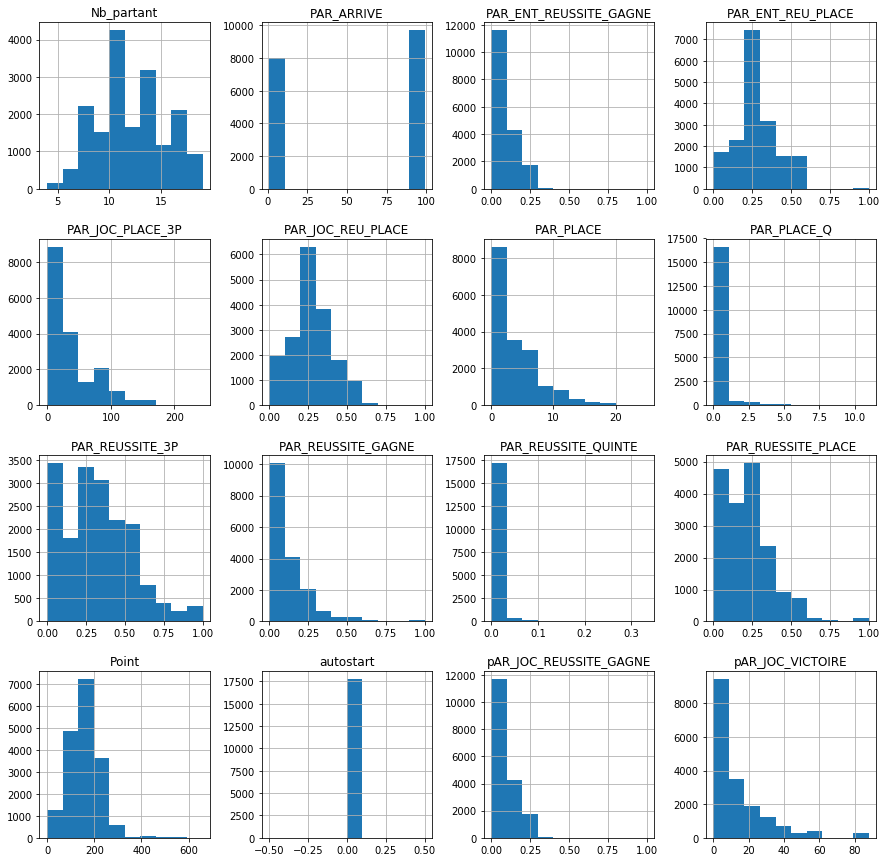

In [12]:
pd.DataFrame.hist(df_gagnant, figsize = [15,15]);

# CORRELATION DES DONNEE AVEC CHEVAUX PARMI LES 3 PREMIERS

In [13]:
# Creating bins for the win column
def assign_selection(W):
    
    if W >=1 and W <=3:
        return 1
    if W >3:
        return 0
    


In [14]:

#df_gagnant['SELECTION'] = (df_gagnant.PAR_ARRIVE<=3).astype(int)
df_gagnant['SELECTION'] = df_gagnant['PAR_ARRIVE'].apply(assign_selection)
#Suppression de la colonne PAR_ARRIVE
#longueur
nb=len(df_gagnant)

# pour chaque ligne du df_gagnant
#for i in xrange(df_gagnant):




#Suppression de la PAR_ARRIVE
# Elle ne sert plus
#df_gagnant.drop(["IDPARTCIPANT"], axis=1, inplace=True)
#df_gagnant.drop(["IDCOURSE"], axis=1, inplace=True)
df_gagnant.drop(["PAR_ARRIVE"], axis=1, inplace=True)
df_gagnant.drop(["Nb_partant"], axis=1, inplace=True)
df_gagnant.drop(["autostart"], axis=1, inplace=True)




print(df_gagnant.shape) # description de l'ensemble

(17739, 14)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\ProgramDat

# Les plus forte correlations avec SELECTION sont :

 PAR_REUSSITE_3P
 Point
 PAR_JOC_REU_PLACE


PAR_REUSSITE_GAGNE
PAR_ENT_REU_PLACE
PAR_JOC_REUSSITE_GAGNE
PAR_ENT_REUSSITE_GAGNE
PAR_JOC_NB_COURSE
PAR_JOC_PLACE_3P
PAR_JOC_VICTOIRE
PAR_ENT_VICTOIRE







In [15]:

COLUM=df_gagnant.columns
print(COLUM)
print(df_gagnant.shape) # description de l'ensemble


Index(['PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_JOC_PLACE_3P',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE',
       'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point', 'SELECTION'],
      dtype='object')
(17739, 14)


In [16]:
print(df_gagnant.shape) # description de l'ensemble
Lib_features = list(df_gagnant.columns[:13]) # Liebllé des variable DATA

#---------------------------------------------------
feature_columns = Lib_features
#feature_columns=["Point","PAR_RUESSITE_PLACE","PAR_REUSSITE_QUINTE","PAR_ENT_REUSSITE_GAGNE","PAR_REUSSITE_3P","PAR_PLACE_Q","PAR_PLACE","pAR_JOC_VICTOIRE"]
n_features =len(feature_columns)
#---------------------------------------------------

print(feature_columns)
lib_cible =  "SELECTION" # libellé de la variable CIBLE
response_column = ["SELECTION"]

my_Features=["Point","PAR_COTEDER"]
##my_Features=["PAR_REUSSITE_3P","Point","PAR_JOC_REU_PLACE","PAR_REUSSITE_GAGNE","PAR_ENT_REU_PLACE","PAR_ENT_VICTOIRE"]
#Lib_features=my_Features
#my_Features = Lib_features
#Lib_features=my_Features

(17739, 14)
['PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_JOC_PLACE_3P', 'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE', 'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE', 'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point']


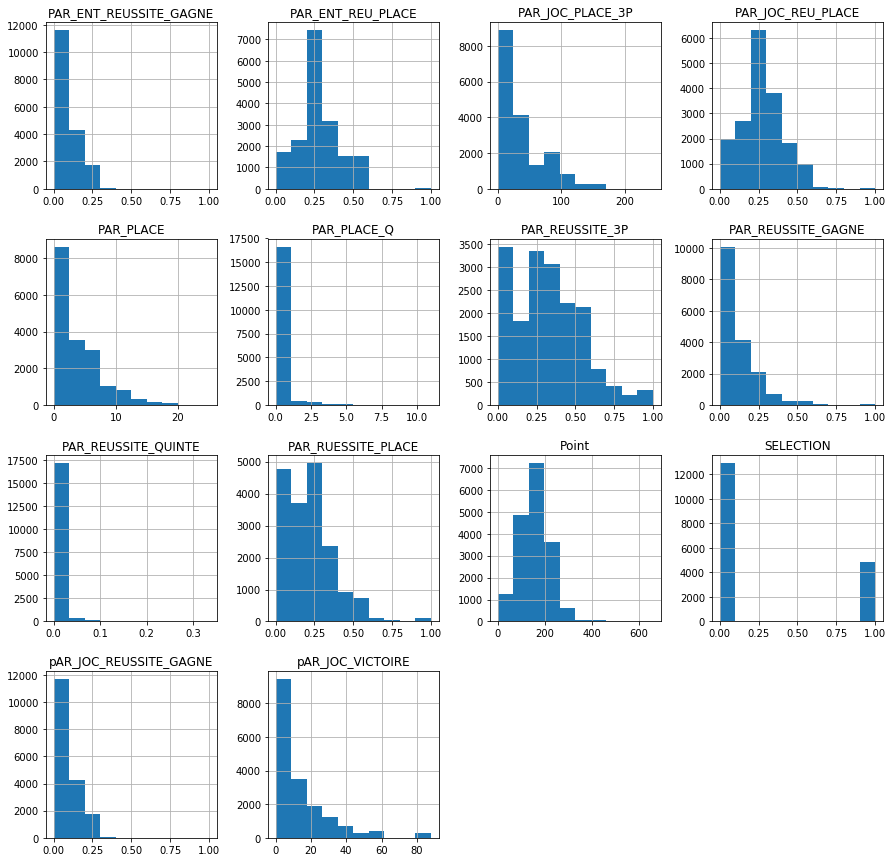

In [17]:
pd.DataFrame.hist(df_gagnant, figsize = [15,15]);

#  SEPARATION DES DONNEES

# Training et Test

In [18]:
df_scale = df_gagnant.copy()


train_x, test_x, train_y, test_y = split_dataset(df_gagnant, 0.8, Lib_features, lib_cible)    

#print(df_gagnant.columns) # description de l'ensemble
print(train_x.columns) # description de l'ensemble

Train_x Shape ::  (14191, 13)
Train_y Shape ::  (14191,)
Test_x Shape ::  (3548, 13)
Test_y Shape ::  (3548,)
Index(['PAR_ENT_REU_PLACE', 'PAR_ENT_REUSSITE_GAGNE', 'PAR_JOC_PLACE_3P',
       'PAR_JOC_REU_PLACE', 'pAR_JOC_REUSSITE_GAGNE', 'pAR_JOC_VICTOIRE',
       'PAR_PLACE', 'PAR_PLACE_Q', 'PAR_REUSSITE_3P', 'PAR_REUSSITE_GAGNE',
       'PAR_REUSSITE_QUINTE', 'PAR_RUESSITE_PLACE', 'Point'],
      dtype='object')


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
from sklearn.preprocessing import StandardScaler
mms=StandardScaler()
train_x=mms.fit_transform(train_x)
test_x=mms.transform(test_x)


In [20]:
train_x[0]

array([-1.9395105 , -1.23846207, -0.97853216, -1.8989828 , -1.15935258,
       -0.7954048 , -0.44049359, -0.27780224,  1.35315634,  2.80194511,
       -0.18697744, -0.49273678, -1.55390571])

In [21]:
# Définir une classe TIme au temps d'exécution total de l'ordinateur
class Timer:
  def __init__(self):
    self.start = time.time()

  def restart(self):
    self.start = time.time()

  def get_time(self):
    end = time.time()
    m, s = divmod(end - self.start, 60)
    h, m = divmod(m, 60)
    time_str = "%02d:%02d:%02d" % (h, m, s)
    return time_str


In [22]:
# Utility function to report best scores
def report(results, n_top=20):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
          
            print("")            

In [23]:
#Définir une fonction d'utilité pour signaler les meilleurs scores
def Report_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [24]:
#Définir une méthode pour tracer l'importance du prédicteur
def Plot_predictor_importance(best_model, feature_columns):
    feature_importance = best_model.feature_importances_
    feature_importance = 100.0 * (feature_importance / feature_importance.max())
    sorted_idx = np.argsort(feature_importance)
    y_pos  = np.arange(sorted_idx.shape[0]) + .5
    fig, ax = plt.subplots()
    ax.barh(y_pos, 
            feature_importance[sorted_idx], 
            align='center', 
            color='green', 
            ecolor='black', 
            height=1)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(feature_columns)
    ax.invert_yaxis()
    ax.set_xlabel('Relative Importance')
    ax.set_title('Predictor Importance')
    plt.show()

In [25]:
#Définir une méthode pour imprimer la matrice de confusion et les indicateurs de performance
def Print_confusion_matrix(cm, auc, heading):
    print('\n', heading)
    print(cm)
    true_negative  = cm[0,0]
    true_positive  = cm[1,1]
    false_negative = cm[1,0]
    false_positive = cm[0,1]
    total = true_negative + true_positive + false_negative + false_positive
    accuracy = (true_positive + true_negative)/total
    precision = (true_positive)/(true_positive + false_positive)
    recall = (true_positive)/(true_positive + false_negative)
    misclassification_rate = (false_positive + false_negative)/total
    F1 = (2*true_positive)/(2*true_positive + false_positive + false_negative)
    print('accuracy.................%7.4f' % accuracy)
    print('precision................%7.4f' % precision)
    print('recall...................%7.4f' % recall)
    print('F1.......................%7.4f' % F1)
    print('auc......................%7.4f' % auc)

# hyper parametres

In [26]:
# specify parameters and distributions to sample from
param_dist = {"max_leaf_nodes": [None,100,1000,1500,2000,2100,2500, 4000,5000],
              "min_samples_leaf": [5,50,100,500,1000,200,1000,4000,500],
                "splitter" : ("best", "random"),
                 "random_state": [None,15,20,30,42,50],
              "criterion": ["gini", "entropy"]}

# Construction de l'estimateur

In [27]:
# build a classifier
clf = DecisionTreeClassifier(class_weight = 'balanced')


# Iteration de l'estimateur avec RandomizeSearch

In [28]:
my_timer = Timer()
n_iter_search = 10
estimator = RandomizedSearchCV(clf,
                                   param_distributions = param_dist,
                                   n_iter = n_iter_search)                                                  
elapsed = my_timer.get_time()
print("\nTemps de calcul est : %s" % elapsed) 


Temps de calcul est : 00:00:00


In [29]:
#n_iter_search = 20
#random_search = RandomizedSearchCV(clf, param_distributions=param_dist,
#                                   n_iter=n_iter_search)

# FIT

In [30]:
fit = estimator.fit(train_x,train_y)
    

# Cross Validation + Tracer les courbes d'apprentissage.

In [31]:
my_timer = Timer()
cv_ = ShuffleSplit(n_splits = 20, test_size = 0.20, random_state = 0)
#Plot_learning_curve(estimator,'Learning Curves',train_x, train_y, cv = cv_,n_jobs = 1)
elapsed = my_timer.get_time()
print("\nTemps de calcul est : %s" % elapsed) 


Temps de calcul est : 00:00:00


# affichage score

In [32]:
my_timer = Timer()
Report_scores(estimator.cv_results_, n_top = 3)
elapsed = my_timer.get_time()
print("\nTemps de calcul REPORT est : %s" % elapsed) 


Model with rank: 1
Mean validation score: 0.664 (std: 0.006)
Parameters: {'splitter': 'best', 'random_state': 42, 'min_samples_leaf': 5, 'max_leaf_nodes': 100, 'criterion': 'gini'}

Model with rank: 2
Mean validation score: 0.662 (std: 0.013)
Parameters: {'splitter': 'best', 'random_state': None, 'min_samples_leaf': 500, 'max_leaf_nodes': 2500, 'criterion': 'entropy'}

Model with rank: 3
Mean validation score: 0.660 (std: 0.006)
Parameters: {'splitter': 'best', 'random_state': 20, 'min_samples_leaf': 50, 'max_leaf_nodes': None, 'criterion': 'gini'}


Temps de calcul REPORT est : 00:00:00


# Meilleur modele :  BEST_MODEL


In [33]:
best_model = estimator.best_estimator_
print('\nbest_model:\n', best_model)



best_model:
 DecisionTreeClassifier(class_weight='balanced', criterion='gini',
            max_depth=None, max_features=None, max_leaf_nodes=100,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')


# Importance des features


Feature Importances: [ 0.022727    0.01369003  0.0313065   0.02364329  0.01827718  0.02884063
  0.02167539  0.00978563  0.63391841  0.00599682  0.00201567  0.01001325
  0.17811019]


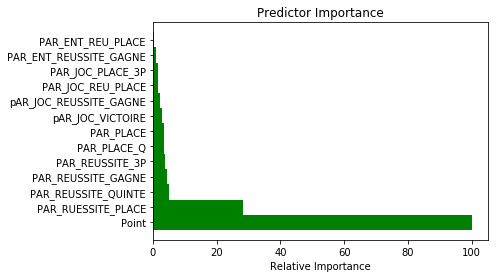

In [34]:
print('\nFeature Importances:', best_model.feature_importances_)
Plot_predictor_importance(best_model, feature_columns)

In [35]:
y_predicted = best_model.predict(train_x)
probabilities = best_model.predict_proba(train_x)

In [36]:
c_report = classification_report(train_y, y_predicted)
print('\nClassification report:\n', c_report)



Classification report:
              precision    recall  f1-score   support

          0       0.88      0.69      0.78     10321
          1       0.48      0.75      0.59      3870

avg / total       0.77      0.71      0.72     14191



# Matrice de confusion du ensemble d'entrainement

In [37]:
    y_predicted_train = best_model.predict(train_x)
    cm = confusion_matrix(train_y, y_predicted_train)
    auc = roc_auc_score(train_y, y_predicted_train)
    Print_confusion_matrix(cm, auc, 'Confusion matrics of the training dataset')


 Confusion matrics of the training dataset
[[7154 3167]
 [ 958 2912]]
accuracy................. 0.7093
precision................ 0.4790
recall................... 0.7525
F1....................... 0.5854
auc...................... 0.7228


In [38]:
y_predicted = best_model.predict(test_x)
cm = confusion_matrix(test_y, y_predicted)
auc = roc_auc_score(test_y, y_predicted)

ntotal = len(test_y)
correct = test_y == y_predicted
numCorrect = sum(correct)
percent = round( (100.0*numCorrect)/ntotal, 6)
print("\nCorrect classifications on test data: {0:d}/{1:d} {2:8.3f}%".format(numCorrect, ntotal, percent))
prediction_score = 100.0*best_model.score(test_x, test_y)
print('Forest Prediction Score on test data: %8.3f' % prediction_score)




Correct classifications on test data: 2408/3548   67.869%
Forest Prediction Score on test data:   67.869


# PROBA  = Ensemble des probabilités de X_TEST

In [39]:
PROBA=best_model.predict_proba(test_x)
#PROBAL=best_model.predict_log_proba(test_x)

# DONNEES DE TEST = X_TEST

In [40]:
data_frame_proba = pd.DataFrame.from_dict(PROBA)
data_frame_proba.head()

,0,1
0,0.660131,0.339869
1,0.683700,0.316300
2,0.699228,0.300772
3,0.971828,0.028172
4,0.523968,0.476032


In [41]:
PROBA[1]
PROBA


array([[ 0.66013119,  0.33986881],
       [ 0.68369998,  0.31630002],
       [ 0.69922774,  0.30077226],
       ..., 
       [ 0.66013119,  0.33986881],
       [ 0.11198244,  0.88801756],
       [ 0.66013119,  0.33986881]])

# JOUER

In [42]:

df_numero_a_predire[lib_cible] =0
train_x, test_x, train_y, test_y = split_dataset(df_numero_a_predire, 0, feature_columns, response_column)   

test_copy = test_x.copy()

test_x.head()

Train_x Shape ::  (0, 13)
Train_y Shape ::  (0, 1)
Test_x Shape ::  (26, 13)
Test_y Shape ::  (26, 1)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


,,,PAR_ENT_REU_PLACE,PAR_ENT_REUSSITE_GAGNE,PAR_JOC_PLACE_3P,PAR_JOC_REU_PLACE,pAR_JOC_REUSSITE_GAGNE,pAR_JOC_VICTOIRE,PAR_PLACE,PAR_PLACE_Q,PAR_REUSSITE_3P,PAR_REUSSITE_GAGNE,PAR_REUSSITE_QUINTE,PAR_RUESSITE_PLACE,Point
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,,,,,,,,,,
604099.0,48830.0,9.0,0.23,0.08,38.0,0.21,0.04,8.0,19.0,9.0,0.433333,0.116667,0.05,0.316667,288.0
604056.0,48826.0,4.0,0.00,0.00,12.0,0.21,0.01,1.0,8.0,1.0,0.414634,0.219512,0.00,0.195122,164.0
604089.0,48830.0,1.0,0.26,0.09,9.0,0.34,0.07,2.0,2.0,0.0,0.333333,0.250000,0.00,0.083333,134.0
604066.0,48827.0,6.0,0.34,0.13,7.0,0.23,0.06,2.0,0.0,0.0,0.000000,0.000000,0.00,0.000000,94.0
604044.0,48824.0,3.0,0.59,0.27,157.0,0.59,0.29,79.0,4.0,0.0,1.000000,0.000000,0.00,1.000000,305.0


In [43]:
#from sklearn.preprocessing import MinMaxScaler
#mms=MinMaxScaler()
#test_x=mms.fit_transform(test_x)
#test_x=mms.transform(test_x)

from sklearn.preprocessing import StandardScaler
mms=StandardScaler()
test_x=mms.fit_transform(test_x)
#test_x=mms.transform(test_x)


In [44]:
y_pred=best_model.predict(test_x)


In [45]:

df_pred = pd.DataFrame.from_dict(y_pred)
#print(df_pred)
print(y_pred)


[0 0 0 0 1 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 0]


In [46]:
PROBA=best_model.predict_proba(test_x)


df_proba = pd.DataFrame.from_dict(PROBA)



In [47]:
# ajouter a test_x les collone 0 et 1 (probabilité)


df_final =pd.concat([df_proba,df_pred], axis=1)


df_final.head()



,0,1,0
0,0.714266,0.285734,0
1,0.523968,0.476032,0
2,0.660131,0.339869,0
3,0.939489,0.060511,0
4,0.111982,0.888018,1


In [48]:
test_x = test_copy.copy()

In [49]:
def my_drop(df,col):
    if col in df:
        df.drop([col], axis=1, inplace=True)
    return df    

In [50]:
test_x=my_drop(test_x,'PAR_CLASSE_AGE')
test_x=my_drop(test_x,'PAR_ENT_ECART_GAGNANT')
test_x=my_drop(test_x,'PAR_ENT_RAPPORT_GAGNANT_M')
test_x=my_drop(test_x,'PAR_ENT_REU_PLACE')
test_x=my_drop(test_x,'PAR_ENT_REUSSITE_GAGNE')
test_x=my_drop(test_x,'PAR_ENT_VICTOIRE')
test_x=my_drop(test_x,'PAR_GAIN')
test_x=my_drop(test_x,'pAR_JOC_ECART_GAGNANT')
test_x=my_drop(test_x,'PAR_JOC_ECART_PLACE')
test_x=my_drop(test_x,'PAR_JOC_NB_COURSE')
test_x=my_drop(test_x,'PAR_JOC_PLACE_3P')
test_x=my_drop(test_x,'PAR_REUSSITE_GAGNE')
test_x=my_drop(test_x,'PAR_REUSSITE_QUINTE')
test_x=my_drop(test_x,'PAR_RUESSITE_PLACE')
test_x=my_drop(test_x,'CO_PRIX')
test_x=my_drop(test_x,'PAR_CARRIERE')
test_x=my_drop(test_x,'PAR_CARRIERE_Q')
test_x=my_drop(test_x,'pAR_JOC_RAPPORT_GAGNANT_M')
test_x=my_drop(test_x,'pAR_JOC_REUSSITE_GAGNE')
test_x=my_drop(test_x,'pAR_JOC_VICTOIRE')
test_x=my_drop(test_x,'PAR_PLACE')
test_x=my_drop(test_x,'PAR_PLACE_Q')
test_x=my_drop(test_x,'PAR_CLASSE_AGE')
test_x=my_drop(test_x,'pAR_JOC_VICTOIRE')
test_x=my_drop(test_x,'PAR_REUSSITE_3P')
test_x=my_drop(test_x,'PAR_JOC_REU_PLACE')
test_x=my_drop(test_x,'PAR_COTEDER')
test_x=my_drop(test_x,'musique')

test_x.head()


,,,Point
IDPARTCIPANT,IDCOURSE,PAR_NUM,
604099.0,48830.0,9.0,288.0
604056.0,48826.0,4.0,164.0
604089.0,48830.0,1.0,134.0
604066.0,48827.0,6.0,94.0
604044.0,48824.0,3.0,305.0


In [51]:
print(test_x.columns)



Index(['Point'], dtype='object')


In [52]:
test_x['v0']=0.0
test_x['v1']=0.0
test_x['sel']=0
#test_x



In [53]:
cumul=1

my_timer = Timer()
nb_rows=len(df_proba.index)

for i in range(0,nb_rows):
    n=df_proba[0][i]
    test_x['v0'][i]=n    
    n=df_proba[1][i]
    test_x['v1'][i]=n      
    #i +=1
    

elapsed = my_timer.get_time()
print("\nTemps de la copie est : %s" % elapsed)     
    


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.



Temps de la copie est : 00:00:01


In [54]:
test_x.head()

,,,Point,v0,v1,sel
IDPARTCIPANT,IDCOURSE,PAR_NUM,,,,
604099.0,48830.0,9.0,288.0,0.714266,0.285734,0
604056.0,48826.0,4.0,164.0,0.523968,0.476032,0
604089.0,48830.0,1.0,134.0,0.660131,0.339869,0
604066.0,48827.0,6.0,94.0,0.939489,0.060511,0
604044.0,48824.0,3.0,305.0,0.111982,0.888018,0


# Recuperation du resultat de la predication sous forme CSV
# Ce fichier est lu par EXE windev !!!!!!!
# Pour chaque course,numero un pourcentage pour chaque classe

In [55]:
test_x.to_csv('d:\py_resultat.csv')

